In [49]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, \
    GradientBoostingClassifier, GradientBoostingRegressor, \
    RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier, MLPRegressor


from tqdm.notebook import tqdm
tqdm().pandas()

xrd_data_path = '../nano281-final-lab-2020-data/cod_xrd_42k.csv'
test_data_path = '../nano281-final-lab-2020-data/test.csv'
data_path = '../nano281-final-lab-2020-data/'

/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [279]:
raw_data = pd.read_csv(xrd_data_path)
label_dict = {}
label = 0
for i in y.unique():
    label_dict[i] = label
    label += 1
rename = lambda x: label_dict[x]
raw_data['label'] = raw_data['bravais_lattice'].apply(rename)

In [3]:
cols = list(raw_data.columns)
cols.remove('formula')
cols.remove('spacegroup_number')
cols.remove('cod_id')
cols.remove('bravais_lattice')

In [4]:
ultimate_X = raw_data[cols]
ultimate_y = raw_data['bravais_lattice']
ultimate_X_train, ultimate_X_test, ultimate_y_train, ultimate_y_test = train_test_split(ultimate_X, ultimate_y, test_size = 0.2)

In [280]:
test_subset = raw_data.sample(n=10000)

In [6]:
validation_index = []
for i in raw_data.index:
    if i not in test_subset.index:
        validation_index.append(i)

In [7]:
validate_df = raw_data.iloc[validation_index]

In [132]:
graph_data.loc[0,'index'][1:]

'0'

## Data Visualization Experimentation

In [145]:
graph_data = pd.DataFrame(test_subset.loc[11984, cols])
graph_data = graph_data.reset_index()
graph_data = graph_data.rename({11984: 'intensity', 'index': '2_theta'}, axis=1)
stripper = lambda x: int(x[1:])
graph_data['2_theta'] = graph_data['2_theta'].apply(stripper)
graph_data['intensity'] = graph_data['intensity'].astype(float)

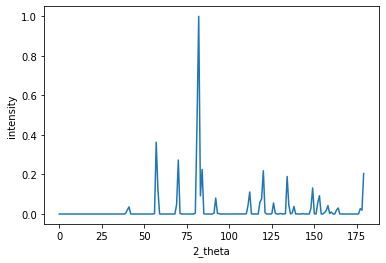

In [146]:
sns.lineplot(x=graph_data['2_theta'], y=graph_data['intensity'])

## Dimensionality Reduction with PCA

In [215]:
def get_pca_df(n):
    pca = PCA(n)
    dat = np.array(test_subset[cols])
    pca_dat = pca.fit_transform(dat)
    pca_df = pd.DataFrame(pca_dat)
    pca_design_matrix = test_subset.copy(deep=True)
    pca_design_matrix = pca_design_matrix.drop(cols, axis=1)
    pca_design_matrix = pca_design_matrix.reset_index()
    renamer = lambda x: 'PCA' + str(x)
    pca_cols = []
    pca_design_matrix = pca_design_matrix.join(pca_df)
    for i in pca_design_matrix.columns:
        if isinstance(i, int):
            pca_design_matrix = pca_design_matrix.rename({i: renamer(i)}, axis=1)
            pca_cols.append(renamer(i))
    return pca_design_matrix

In [216]:
test_df_90 = get_pca_df(90)

In [8]:
pca = PCA(20, whiten=True)
dat = np.array(test_subset[cols])
pca_dat = pca.fit_transform(dat)
pca_df = pd.DataFrame(pca_dat)
pca_design_matrix = test_subset.copy(deep=True)
pca_design_matrix = pca_design_matrix.drop(cols, axis=1)
# pca_design_matrix['id'] = test_subset_copy.index
pca_design_matrix = pca_design_matrix.reset_index()
renamer = lambda x: 'PCA' + str(x)
pca_cols = []
pca_design_matrix = pca_design_matrix.join(pca_df)
for i in pca_design_matrix.columns:
    if isinstance(i, int):
        pca_design_matrix = pca_design_matrix.rename({i: renamer(i)}, axis=1)
        pca_cols.append(renamer(i))

In [212]:
test_df

index                  formula  spacegroup_number   cod_id  \
0     11984                  NdGaCo4                191  1527564   
1     21866               H22C11INO2                  4  2232567   
2      3865  CaGaH68C45S4N4Cl2(O5F)3                  2  1514391   
3     32623             Bi2(Pb2Se3)3                 63  4345134   
4     24149        Fe3P2H28C24(NO3)2                 15  7041093   
...     ...                      ...                ...      ...   
9995  23026  Zn3Co2H56C24N10(Cl5O2)2                  5  7008103   
9996  27970                    LaZn2                 74  1537766   
9997   8888            Al0.6Si0.4Ni3                221  1522546   
9998  41081                Pr2Ge5Ru3                128  4125883   
9999   2488            H19C23SBr2NO4                  2  2205622   

     bravais_lattice      PCA0      PCA1      PCA2      PCA3      PCA4  ...  \
0                 hP -1.033359 -0.223617 -0.600362 -0.329136  0.869386  ...   
1                 mP  0.889046  0.383182  0.011552 -0.408847 -0.411639  ...   
2                 aP  2.825851 -1.338223  1.445447  1.738983  0.498887  ...   
3                 oS  0.010222  2.064723 -2.772993 -0.133083  1.470557  ...   
4                 mS -0.054171 -1.314079  0.082025  1.056058  0.590405  ...   
...              ...       ...       ...       ...       ...       ...  ...   
9995              mS  2.807835  0.677696 -0.576474  1.622328  0.327292  ...   
9996              oI -1.105707  0.404001  3.174027  0.414028 -0.489317  ...   
9997              cP -1.071062 -0.388789 -0.372828 -0.229615 -0.312198  ...   
9998              tP -0.655542  1.313371 -0.504006  1.218821  0.344235  ...   
9999              aP  2.414344  1.318635  1.124926 -0.266346 -0.843655  ...   

         PCA80     PCA81     PCA82     PCA83     PCA84     PCA85     PCA86  \
0     0.935273 -0.109464 -0.745979  0.159345 -0.959167  0.286685 -0.540213   
1    -0.086203  0.139257  1.053310  1.134577  0.462138  0.758404 -0.514598   
2     0.049782  0.800420  0.322639  0.210638 -0.425345 -0.328852 -0.006377   
3     0.011938  0.351595 -1.174958 -1.195938 -0.026459  0.574170 -0.502650   
4    -0.082641 -0.208652 -0.281541 -0.045103 -0.093763  0.085514  0.021831   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.750430  0.487484 -1.218073  0.916246 -0.873185 -0.287569 -0.933316   
9996 -0.985857 -0.057152  0.757254 -0.744843 -0.868431  0.476217  0.258267   
9997 -0.409367 -0.389630  0.478791 -1.817766 -0.099199  0.545586  1.305566   
9998 -1.613152  0.052296 -0.994336 -1.798225  0.367300 -1.125089  0.151981   
9999  0.647998 -2.616983 -0.570619  0.206991  0.242327  1.104176  0.099547   

         PCA87     PCA88     PCA89  
0    -1.071224  0.382229  0.609732  
1     0.442259  0.900064  0.227414  
2    -0.566789  0.014769 -0.019353  
3     1.733204  0.512573 -0.085400  
4     0.002193 -0.050140 -0.157588  
...        ...       ...       ...  
9995  0.159774  0.192087 -0.208868  
9996  0.832644  0.414049 -0.563700  
9997  0.494254  5.458571 -2.447531  
9998  0.173894 -0.339665  1.839222  
9999  0.457797  0.705615  0.231318  

[10000 rows x 95 columns]

### Try out decision tree

In [29]:
X = pca_design_matrix.filter(regex='^PCA', axis=1)
y = pca_design_matrix['bravais_lattice']
pca_x_train, pca_x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier(criterion='entropy', random_state = 42, max_depth =8)
model.fit(pca_x_train, y_train)
train = model.score(pca_x_train, y_train)
test = model.score(pca_x_test, y_test)
print('train accuracy:', train, "\ntest accuracy:", test)   

train accuracy: 0.3545 
test accuracy: 0.255


In [53]:
def test_accuracy(pca_design_matrix):
    X = pca_design_matrix.filter(regex='^PCA', axis=1)
    y = pca_design_matrix['bravais_lattice']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = DecisionTreeClassifier(criterion='entropy', random_state = 42, max_depth = 8)
    model.fit(x_train, y_train)
    train = model.score(x_train, y_train)
    test = model.score(x_test, y_test)
    print('train accuracy:', train, "\ntest accuracy:", test) 

In [58]:
test_accuracy(test_df)

train accuracy: 0.351 
test accuracy: 0.239


In [217]:
test_accuracy(test_df_90)

train accuracy: 0.366125 
test accuracy: 0.2575


In [55]:
test_accuracy(pca_design_matrix)

train accuracy: 0.34675 
test accuracy: 0.2545


In [37]:
x_train

0

In [27]:
tree20 = get_pca_decision_tree(test_df)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [22]:
def score_model(model, x_train, y_train, x_test, y_test):
    train = model.score(x_train, y_train)
    test = model.score(x_test, y_test)
    print('train accuracy:', train, "\ntest accuracy:", test)

In [24]:
score_model(tree20)

TypeError: score_model() missing 4 required positional arguments: 'x_train', 'y_train', 'x_test', and 'y_test'

In [61]:
X = test_subset[cols]
y = test_subset['bravais_lattice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_train, y_train)

0.44225

In [63]:
decision_tree.score(X_test, y_test)

0.327

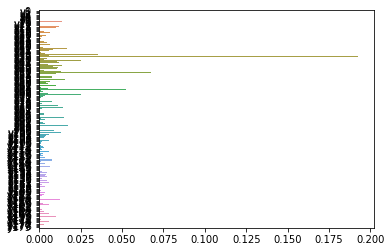

In [64]:
sns.barplot(decision_tree.feature_importances_, list(X.columns), orient='h')

In [78]:
model = AdaBoostClassifier(decision_tree, n_estimators=100)
model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [79]:
model.score(x_train, y_train)

0.5225

In [80]:
model.score(x_test, y_test)

0.2155

### yikes, this is a terrible result. At least it's better than last place though

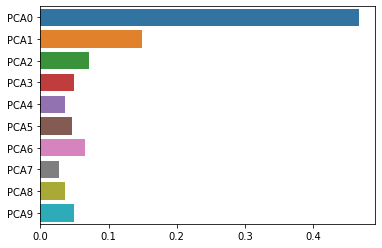

In [26]:
sns.barplot(decision_tree.feature_importances_, list(X.columns), orient='h')


In [27]:
def plot_grid_search_results(gs, ylim=None):
    """
    Plots the results of GridSearchCV.
    
    Args:
        gs: A GridSearchCV object.
        ylim: Optional setting for y limits.
    """
    results = pd.DataFrame(gs.cv_results_)
    for c in results.columns:
        # Note that here we are working with just variations in one parameter.
        # So we can automatically find the name of that parameter.
        if c.startswith("param_"):
            x = c
            break
    fig, ax = plt.subplots(figsize=(16, 8))    
    ax = sns.lineplot(x=x, y="mean_train_score", data=results)
    ax = sns.scatterplot(x=x, y="mean_train_score", data=results, marker='x')
    ax = sns.lineplot(x=x, y="mean_test_score", data=results)
    ax = sns.scatterplot(x=x, y="mean_test_score", data=results, marker='o')
    plt.xlabel(x)
    if ylim:
        plt.ylim(ylim)
    ax.legend(["Train", "Test"], loc=2);

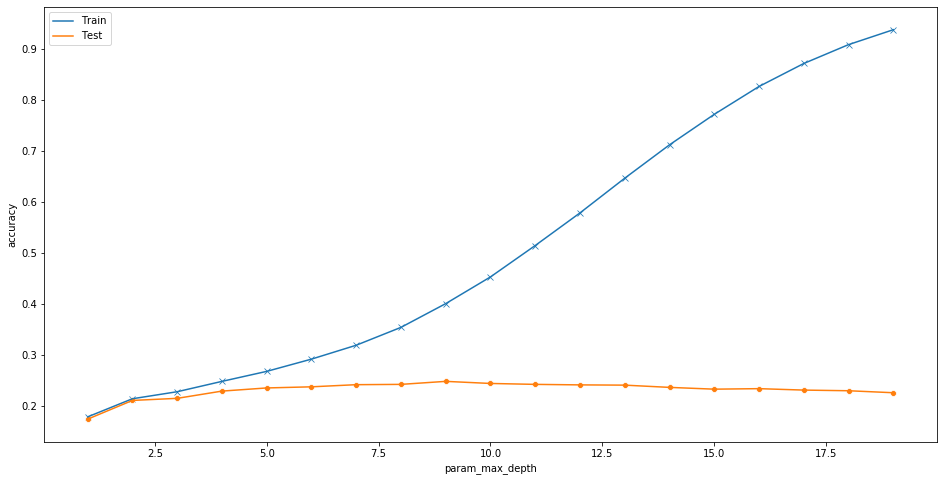

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"max_depth": list(range(1, 20))},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

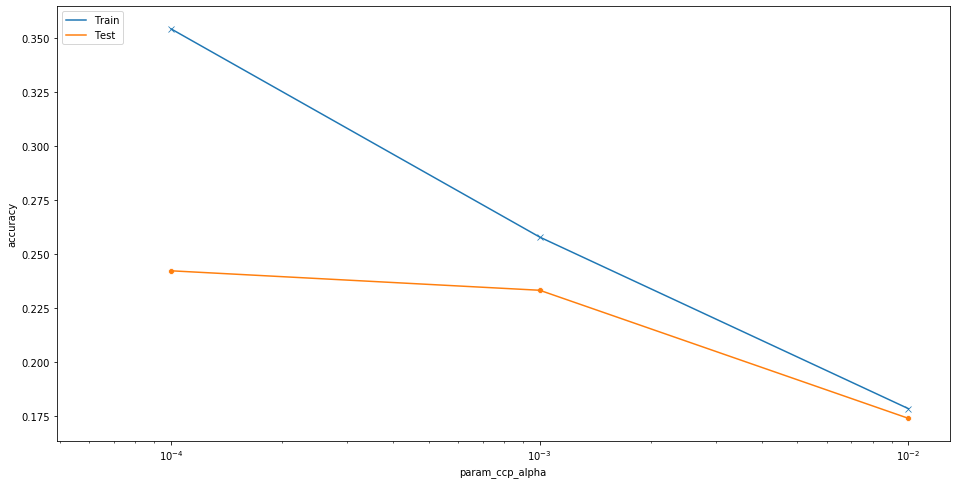

In [29]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
gs = GridSearchCV(
    decision_tree,
    param_grid={"ccp_alpha": [1e-4, 1e-3, 1e-2]},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy")
plt.xscale('log');


# Try Decision Tree without dimensionality reduction

In [233]:
X = test_subset[cols]
y = test_subset['bravais_lattice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
tree = DecisionTreeClassifier(criterion='entropy', random_state = 42, max_depth = 10, ccp_alpha = 1e-3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [101]:
tree.score(X_train, y_train)

0.582375

In [102]:
tree.score(X_test, y_test)

0.3305

In [103]:
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"max_depth": list(range(1, 15))},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy")

KeyboardInterrupt: 

In [219]:
np.linspace(5, 50, num = 10)

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

##### depth of 10 appears to give best accuracy for non-pca

In [220]:
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
ccp_alpha = [1e-4, 1e-3, 1e-2]
# Create the random grid
random_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'ccp_alpha': ccp_alpha}
pprint(random_grid)

{'ccp_alpha': [0.0001, 0.001, 0.01],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


In [224]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 1000, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [225]:
dt_random.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'ccp_alpha': 0.0001}

In [226]:
base_model = DecisionTreeClassifier(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_test, y_test)
best_random = dt_random.best_estimator_
random_accuracy = best_random.score(X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -8.33%.


In [228]:
base_accuracy

0.312

### Try boosted learning models

In [61]:
model = AdaBoostClassifier(tree)

gs = GridSearchCV(
    model,
    param_grid={"n_estimators": range(10,100,20)},
    return_train_score = True,
    scoring="accuracy"
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

KeyboardInterrupt: 

**Random Forest**

In [72]:
model_100 = RandomForestClassifier(random_state=42)
model_200 = RandomForestClassifier(random_state=42, n_estimators=200)
model_100.fit(X_train, y_train)
model_100.score(X_test, y_test)

0.4415

In [68]:
model_1000 = RandomForestClassifier(random_state=42, n_estimators=1000)
model_1000.fit(X_train, y_train)
model_1000.score(X_test, y_test)

0.465

In [69]:
model_1000.fit(ultimate_X_train, ultimate_y_train)
model_1000.score(ultimate_X_test, ultimate_y_test)

0.566303957909841

In [177]:
model_200.fit(X_train, y_train)
model_200.score(X_test, y_test)

0.4565

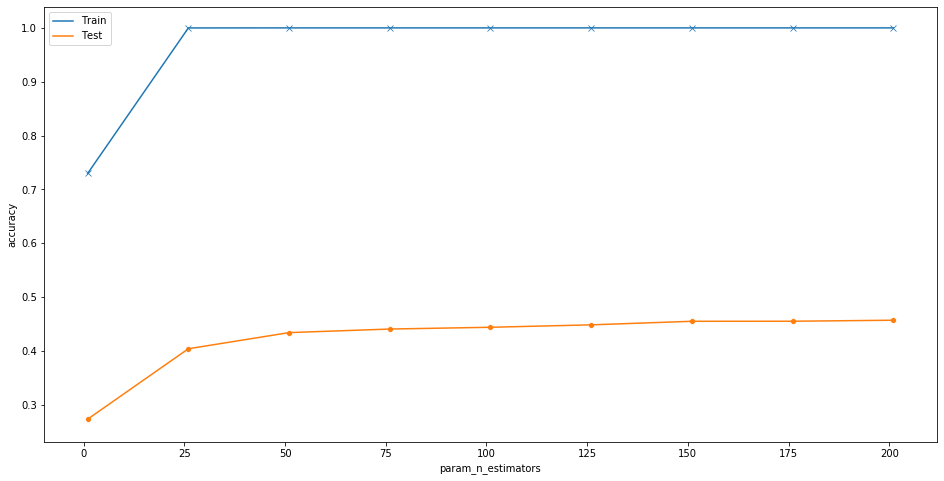

In [174]:
gs_model = RandomForestClassifier(random_state=0)

gs = GridSearchCV(
    gs_model,
    param_grid={"n_estimators": range(1, 1002, 25)},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold,
    n_jobs=4
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

In [125]:
X_valid = validate_df[cols]
y_valid = validate_df['bravais_lattice']

In [70]:
model_100.score(X_valid, y_valid)

NameError: name 'model_100' is not defined

In [71]:
model_100.fit(ultimate_X_train, ultimate_y_train)
model_100.score(ultimate_X_test, ultimate_y_test)

NameError: name 'model_100' is not defined

0.5383235680975726

In [178]:
model_200.fit(ultimate_X_train, ultimate_y_train)
model_200.score(ultimate_X_test, ultimate_y_test)

0.5535095061580773

In [160]:
final_test_df = pd.read_csv(test_data_path)
final_test_df['bravais_lattice'] = model.predict(final_test_df[cols])
final_test_df.head()

id             y0             y1             y2             y3  \
0   0   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
1   1  8.494274e-193  7.309795e-162  1.214349e-133  3.894409e-108   
2   2   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3   3   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
4   4   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   

             y4             y5             y6             y7             y8  \
0  0.000000e+00  4.126624e-296  1.470671e-257  1.011802e-221  1.343801e-188   
1  2.411010e-85   2.881482e-65   6.648020e-48   2.960931e-33   2.545796e-21   
2  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
4  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   

   ...          y171          y172          y173          y174      y175  \
0  ...  5.034175e-02  2.169112e-02  7.874344e-03  7.802616e-02  0.042481   
1  ...  9.658928e-03  1.518444e-02  9.287093e-03  5.173824e-03  0.002088   
2  ...  1.236315e-41  2.761469e-28  1.190723e-17  9.911529e-10  0.000159   
3  ...  2.121434e-03  4.606235e-02  2.547866e-03  8.068338e-04  0.001293   
4  ...  5.740605e-49  3.140308e-34  3.316242e-22  6.760513e-13  0.000003   

       y176      y177      y178          y179  bravais_lattice  
0  0.014938  0.039612  0.022147  1.681035e-02               mS  
1  0.011913  0.005428  0.009213  4.776667e-03               oP  
2  0.049406  0.029586  0.000034  7.632784e-11               cF  
3  0.000252  0.000529  0.000002  1.733872e-11               hP  
4  0.020213  0.296440  0.008393  4.587113e-07               cF  

[5 rows x 182 columns]

In [161]:
final_test_df.drop(cols, axis=1).to_csv((data_path + 'random_forest_1_rramji.csv'), index=False)

In [162]:
RandomForestClassifier?

In [173]:
for i in range(1, 202, 25):
    print(i)

1
26
51
76
101
126
151
176
201


In [179]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3875

In [77]:
X = test_subset[cols]
y = test_subset['bravais_lattice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.3145

In [66]:
adaboost_clf = AdaBoostClassifier(decision_tree)
adaboost_clf.fit(X_train, y_train)
adaboost_clf.score(X_test, y_test)

0.3245

In [148]:
nn = MLPClassifier?

In [ ]:
nn = MLPClassifier

In [ ]:
nn = MLPClassifier

In [198]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, hidden_layer_sizes=(5))

In [199]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [200]:
nn.score(X_test, y_test)

0.264

In [73]:
final_test_df = pd.read_csv(test_data_path)
final_test_df['bravais_lattice'] = model_1000.predict(final_test_df[cols])
final_test_df.head()

id             y0             y1             y2             y3  \
0   0   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
1   1  8.494274e-193  7.309795e-162  1.214349e-133  3.894409e-108   
2   2   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3   3   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
4   4   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   

             y4             y5             y6             y7             y8  \
0  0.000000e+00  4.126624e-296  1.470671e-257  1.011802e-221  1.343801e-188   
1  2.411010e-85   2.881482e-65   6.648020e-48   2.960931e-33   2.545796e-21   
2  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
4  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   

   ...          y171          y172          y173          y174      y175  \
0  ...  5.034175e-02  2.169112e-02  7.874344e-03  7.802616e-02  0.042481   
1  ...  9.658928e-03  1.518444e-02  9.287093e-03  5.173824e-03  0.002088   
2  ...  1.236315e-41  2.761469e-28  1.190723e-17  9.911529e-10  0.000159   
3  ...  2.121434e-03  4.606235e-02  2.547866e-03  8.068338e-04  0.001293   
4  ...  5.740605e-49  3.140308e-34  3.316242e-22  6.760513e-13  0.000003   

       y176      y177      y178          y179  bravais_lattice  
0  0.014938  0.039612  0.022147  1.681035e-02               mS  
1  0.011913  0.005428  0.009213  4.776667e-03               mS  
2  0.049406  0.029586  0.000034  7.632784e-11               cF  
3  0.000252  0.000529  0.000002  1.733872e-11               hP  
4  0.020213  0.296440  0.008393  4.587113e-07               cF  

[5 rows x 182 columns]

In [74]:
final_test_df.drop(cols, axis=1).to_csv((data_path + 'test_1000.csv'), index=False)

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [80]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [81]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [84]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = best_random.score(X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [87]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 10.59%.


In [88]:
random_accuracy

0.47

In [89]:
base_accuracy

0.425

In [92]:
rf_improved = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, 
                                     max_features= 'sqrt', max_depth= 70, bootstrap= False)

In [94]:
rf_improved.fit(ultimate_X_train, ultimate_y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
rf_improved.score(ultimate_X_test, ultimate_y_test)

0.5805333014468492

## Current Best: 0.5805 accuracy on raw data test, 0.5779 on Kaggle test

In [96]:
rf_improved.fit(ultimate_X, ultimate_y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [263]:
rf_ultimate = rf_improved

In [264]:
rf_ultimate.score(x_test, y_test)

1.0

In [97]:
final_test_df = pd.read_csv(test_data_path)
final_test_df['bravais_lattice'] = rf_improved.predict(final_test_df[cols])
final_test_df.head()

id             y0             y1             y2             y3  \
0   0   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
1   1  8.494274e-193  7.309795e-162  1.214349e-133  3.894409e-108   
2   2   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3   3   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
4   4   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   

             y4             y5             y6             y7             y8  \
0  0.000000e+00  4.126624e-296  1.470671e-257  1.011802e-221  1.343801e-188   
1  2.411010e-85   2.881482e-65   6.648020e-48   2.960931e-33   2.545796e-21   
2  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
4  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   

   ...          y171          y172          y173          y174      y175  \
0  ...  5.034175e-02  2.169112e-02  7.874344e-03  7.802616e-02  0.042481   
1  ...  9.658928e-03  1.518444e-02  9.287093e-03  5.173824e-03  0.002088   
2  ...  1.236315e-41  2.761469e-28  1.190723e-17  9.911529e-10  0.000159   
3  ...  2.121434e-03  4.606235e-02  2.547866e-03  8.068338e-04  0.001293   
4  ...  5.740605e-49  3.140308e-34  3.316242e-22  6.760513e-13  0.000003   

       y176      y177      y178          y179  bravais_lattice  
0  0.014938  0.039612  0.022147  1.681035e-02               mS  
1  0.011913  0.005428  0.009213  4.776667e-03               mS  
2  0.049406  0.029586  0.000034  7.632784e-11               cF  
3  0.000252  0.000529  0.000002  1.733872e-11               hP  
4  0.020213  0.296440  0.008393  4.587113e-07               cF  

[5 rows x 182 columns]

In [98]:
final_test_df.drop(cols, axis=1).to_csv((data_path + 'rf_optimized_hyperparams.csv'), index=False)

## FUCK NEURAL NETWORKS

In [ ]:
# # The ith element represents the number of neurons in the ith hidden layer.
# hidden_layer_sizes = [int(x) for x in np.linspace(start = 3, stop = 300, num = 10)]
# # The solver for weight optimization
# solver = ['lbfgs', 'adam']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [156]:
import plotly.graph_objects as go

def plot_grid_search_results(gs, plot_type='bar', ylim=None):
    """
    Plots the results of GridSearchCV.
    """
    results = pd.DataFrame(gs.cv_results_)
    for c in results.columns:
        # Note that here we are working with just variations in one parameter.
        # So we can automatically find the name of that parameter.
        if c.startswith("param_"):
            x = c
            break
    results = results.melt(id_vars=[x], value_vars=['mean_train_score', 'mean_test_score'],
        var_name="type", value_name='score')
    fig, ax = plt.subplots(figsize=(16, 8))
    if plot_type == "bar":
        ax = sns.barplot(x=x, y="score", hue='type', data=results)
    else:
        ax = sns.scatterplot(x=x, y="score", hue='type', data=results)
    plt.xlabel(x)
    if ylim:
        plt.ylim(ylim)
    return fig

def plotly_grid_search_results(gs, plot_type='bar', ylim=None):
    """
    Plots the results of GridSearchCV.
    """
    results = pd.DataFrame(gs.cv_results_)
    for c in results.columns:
        # Note that here we are working with just variations in one parameter.
        # So we can automatically find the name of that parameter.
        if c.startswith("param_"):
            x = c
            break
    results = pd.DataFrame(gs.cv_results_)
    if plot_type == "bar":
        xval = ["(%s)" % l if not isinstance(l, tuple) else str(l) for l in results[x]]
        fig = go.Figure(data=[
            go.Bar(name='Train', x=xval, y=results['mean_train_score']),
            go.Bar(name='Test', x=xval, y=results['mean_test_score'])
        ])
        fig.update_layout(barmode='group')
    else:
        fig = go.Figure(data=[
            go.Scatter(name='Train', x=results[x], y=results['mean_train_score']),
            go.Scatter(name='Test', x=results[x], y=results['mean_test_score'])
        ])
    fig.update_xaxes(title_text=x)
    fig.update_yaxes(title_text='Score')
    return fig

In [150]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, verbose=True, max_iter=500)
gs = GridSearchCV(
    nn,
    param_grid={"hidden_layer_sizes": [(3), (5), (7), (5, 3), (7, 5), (5, 3, 5, 7, 3)]},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X_, y)

Iteration 1, loss = 2.58460173
Iteration 2, loss = 2.35377945
Iteration 3, loss = 2.21767049
Iteration 4, loss = 2.14146010
Iteration 5, loss = 2.11303323
Iteration 6, loss = 2.09941322
Iteration 7, loss = 2.08911255
Iteration 8, loss = 2.08164826
Iteration 9, loss = 2.07633976
Iteration 10, loss = 2.06903682
Iteration 11, loss = 2.06554842
Iteration 12, loss = 2.06041516
Iteration 13, loss = 2.06243012
Iteration 14, loss = 2.05782206
Iteration 15, loss = 2.05468736
Iteration 16, loss = 2.05098065
Iteration 17, loss = 2.05049240
Iteration 18, loss = 2.04483971
Iteration 19, loss = 2.04586681
Iteration 20, loss = 2.04393256
Iteration 21, loss = 2.04154699
Iteration 22, loss = 2.03907539
Iteration 23, loss = 2.03847605
Iteration 24, loss = 2.03621709
Iteration 25, loss = 2.03396809
Iteration 26, loss = 2.03504413
Iteration 27, loss = 2.03283878
Iteration 28, loss = 2.03315295
Iteration 29, loss = 2.03106063
Iteration 30, loss = 2.03001882
Iteration 31, loss = 2.02899275
Iteration 32, los

Iteration 37, loss = 2.01314011
Iteration 38, loss = 2.01228622
Iteration 39, loss = 2.01117888
Iteration 40, loss = 2.00977050
Iteration 41, loss = 2.01102750
Iteration 42, loss = 2.01152155
Iteration 43, loss = 2.01135522
Iteration 44, loss = 2.00829032
Iteration 45, loss = 2.01198506
Iteration 46, loss = 2.00898899
Iteration 47, loss = 2.00864049
Iteration 48, loss = 2.00812051
Iteration 49, loss = 2.00819858
Iteration 50, loss = 2.00781150
Iteration 51, loss = 2.00835465
Iteration 52, loss = 2.00692820
Iteration 53, loss = 2.00576943
Iteration 54, loss = 2.00571642
Iteration 55, loss = 2.00556101
Iteration 56, loss = 2.00654704
Iteration 57, loss = 2.00472481
Iteration 58, loss = 2.00358327
Iteration 59, loss = 2.00467812
Iteration 60, loss = 2.00543048
Iteration 61, loss = 2.00454968
Iteration 62, loss = 2.00416926
Iteration 63, loss = 2.00531789
Iteration 64, loss = 2.00377850
Iteration 65, loss = 2.00440594
Iteration 66, loss = 2.00345975
Iteration 67, loss = 2.00237511
Iteratio

Iteration 56, loss = 1.99942288
Iteration 57, loss = 1.99847041
Iteration 58, loss = 1.99682163
Iteration 59, loss = 1.99775414
Iteration 60, loss = 2.00141786
Iteration 61, loss = 1.99756206
Iteration 62, loss = 1.99766866
Iteration 63, loss = 1.99829221
Iteration 64, loss = 1.99524480
Iteration 65, loss = 1.99739354
Iteration 66, loss = 1.99770389
Iteration 67, loss = 1.99613699
Iteration 68, loss = 1.99625074
Iteration 69, loss = 1.99790877
Iteration 70, loss = 1.99571618
Iteration 71, loss = 1.99582950
Iteration 72, loss = 1.99630050
Iteration 73, loss = 1.99505079
Iteration 74, loss = 1.99563121
Iteration 75, loss = 1.99607440
Iteration 76, loss = 1.99646628
Iteration 77, loss = 1.99570774
Iteration 78, loss = 1.99604844
Iteration 79, loss = 1.99535528
Iteration 80, loss = 1.99402875
Iteration 81, loss = 1.99558443
Iteration 82, loss = 1.99398880
Iteration 83, loss = 1.99391226
Iteration 84, loss = 1.99583846
Iteration 85, loss = 1.99382273
Iteration 86, loss = 1.99397659
Iteratio

Iteration 55, loss = 1.91937218
Iteration 56, loss = 1.92073164
Iteration 57, loss = 1.91802599
Iteration 58, loss = 1.91928139
Iteration 59, loss = 1.91946511
Iteration 60, loss = 1.91809276
Iteration 61, loss = 1.91763006
Iteration 62, loss = 1.91643376
Iteration 63, loss = 1.91962450
Iteration 64, loss = 1.91616293
Iteration 65, loss = 1.91561627
Iteration 66, loss = 1.91603010
Iteration 67, loss = 1.91582418
Iteration 68, loss = 1.91389869
Iteration 69, loss = 1.91667941
Iteration 70, loss = 1.91576090
Iteration 71, loss = 1.91338379
Iteration 72, loss = 1.91371060
Iteration 73, loss = 1.91410414
Iteration 74, loss = 1.91354438
Iteration 75, loss = 1.91238907
Iteration 76, loss = 1.91348852
Iteration 77, loss = 1.91319597
Iteration 78, loss = 1.91333333
Iteration 79, loss = 1.91169546
Iteration 80, loss = 1.91342478
Iteration 81, loss = 1.91278605
Iteration 82, loss = 1.91172118
Iteration 83, loss = 1.91194124
Iteration 84, loss = 1.91104986
Iteration 85, loss = 1.91062860
Iteratio

Iteration 30, loss = 1.98782157
Iteration 31, loss = 1.98683629
Iteration 32, loss = 1.98670758
Iteration 33, loss = 1.98582732
Iteration 34, loss = 1.98498960
Iteration 35, loss = 1.98642857
Iteration 36, loss = 1.98562674
Iteration 37, loss = 1.98496721
Iteration 38, loss = 1.98453134
Iteration 39, loss = 1.98280307
Iteration 40, loss = 1.98281883
Iteration 41, loss = 1.98273523
Iteration 42, loss = 1.98311286
Iteration 43, loss = 1.98290326
Iteration 44, loss = 1.98030372
Iteration 45, loss = 1.98174537
Iteration 46, loss = 1.97937735
Iteration 47, loss = 1.98044328
Iteration 48, loss = 1.98046321
Iteration 49, loss = 1.97860968
Iteration 50, loss = 1.97744799
Iteration 51, loss = 1.97837303
Iteration 52, loss = 1.97851691
Iteration 53, loss = 1.97813167
Iteration 54, loss = 1.97822064
Iteration 55, loss = 1.97703795
Iteration 56, loss = 1.97673421
Iteration 57, loss = 1.97792716
Iteration 58, loss = 1.97466644
Iteration 59, loss = 1.97474230
Iteration 60, loss = 1.97474103
Iteratio

Iteration 35, loss = 1.94725866
Iteration 36, loss = 1.94664462
Iteration 37, loss = 1.94490666
Iteration 38, loss = 1.94438236
Iteration 39, loss = 1.94438509
Iteration 40, loss = 1.94246563
Iteration 41, loss = 1.94393216
Iteration 42, loss = 1.94043048
Iteration 43, loss = 1.94197286
Iteration 44, loss = 1.94057637
Iteration 45, loss = 1.94143785
Iteration 46, loss = 1.93736089
Iteration 47, loss = 1.93714243
Iteration 48, loss = 1.93620200
Iteration 49, loss = 1.93614501
Iteration 50, loss = 1.93552783
Iteration 51, loss = 1.93632463
Iteration 52, loss = 1.93480262
Iteration 53, loss = 1.93422072
Iteration 54, loss = 1.93151594
Iteration 55, loss = 1.93314054
Iteration 56, loss = 1.93056648
Iteration 57, loss = 1.93192756
Iteration 58, loss = 1.92955416
Iteration 59, loss = 1.93018561
Iteration 60, loss = 1.92843969
Iteration 61, loss = 1.92871210
Iteration 62, loss = 1.92858826
Iteration 63, loss = 1.92669582
Iteration 64, loss = 1.92812657
Iteration 65, loss = 1.92664083
Iteratio

Iteration 134, loss = 1.83732079
Iteration 135, loss = 1.83956915
Iteration 136, loss = 1.83851281
Iteration 137, loss = 1.83673219
Iteration 138, loss = 1.83668161
Iteration 139, loss = 1.83871846
Iteration 140, loss = 1.83745657
Iteration 141, loss = 1.83555374
Iteration 142, loss = 1.83452700
Iteration 143, loss = 1.83490425
Iteration 144, loss = 1.83568822
Iteration 145, loss = 1.83475776
Iteration 146, loss = 1.83413327
Iteration 147, loss = 1.83300081
Iteration 148, loss = 1.83306438
Iteration 149, loss = 1.83515251
Iteration 150, loss = 1.83572881
Iteration 151, loss = 1.83333071
Iteration 152, loss = 1.83317786
Iteration 153, loss = 1.83314005
Iteration 154, loss = 1.83191460
Iteration 155, loss = 1.83248514
Iteration 156, loss = 1.83241233
Iteration 157, loss = 1.83174279
Iteration 158, loss = 1.83080742
Iteration 159, loss = 1.83082430
Iteration 160, loss = 1.82904964
Iteration 161, loss = 1.83197176
Iteration 162, loss = 1.83185506
Iteration 163, loss = 1.83262676
Iteration 

Iteration 163, loss = 1.82820872
Iteration 164, loss = 1.83171194
Iteration 165, loss = 1.83171247
Iteration 166, loss = 1.82847467
Iteration 167, loss = 1.82897187
Iteration 168, loss = 1.82927117
Iteration 169, loss = 1.82792347
Iteration 170, loss = 1.82885018
Iteration 171, loss = 1.82800211
Iteration 172, loss = 1.82849416
Iteration 173, loss = 1.82866130
Iteration 174, loss = 1.82775082
Iteration 175, loss = 1.82922665
Iteration 176, loss = 1.82681501
Iteration 177, loss = 1.82585484
Iteration 178, loss = 1.82593266
Iteration 179, loss = 1.82549190
Iteration 180, loss = 1.82637997
Iteration 181, loss = 1.82732305
Iteration 182, loss = 1.82725940
Iteration 183, loss = 1.82708540
Iteration 184, loss = 1.82385630
Iteration 185, loss = 1.82610367
Iteration 186, loss = 1.82841746
Iteration 187, loss = 1.82504907
Iteration 188, loss = 1.82722620
Iteration 189, loss = 1.82413514
Iteration 190, loss = 1.82458725
Iteration 191, loss = 1.82442086
Iteration 192, loss = 1.82221421
Iteration 

Iteration 162, loss = 1.85260062
Iteration 163, loss = 1.85085925
Iteration 164, loss = 1.84725511
Iteration 165, loss = 1.85400586
Iteration 166, loss = 1.84750244
Iteration 167, loss = 1.84882693
Iteration 168, loss = 1.84854659
Iteration 169, loss = 1.84765597
Iteration 170, loss = 1.84795976
Iteration 171, loss = 1.84652460
Iteration 172, loss = 1.84656562
Iteration 173, loss = 1.84501129
Iteration 174, loss = 1.84860915
Iteration 175, loss = 1.84927443
Iteration 176, loss = 1.84644822
Iteration 177, loss = 1.84568026
Iteration 178, loss = 1.84767619
Iteration 179, loss = 1.84647820
Iteration 180, loss = 1.84544705
Iteration 181, loss = 1.84567299
Iteration 182, loss = 1.84676911
Iteration 183, loss = 1.84625337
Iteration 184, loss = 1.84583847
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.45730930
Iteration 2, loss = 2.15568221
Iteration 3, loss = 2.07856726
Iteration 4, loss = 2.04106269
Iteration 5, loss = 2.01737

Iteration 37, loss = 1.87458346
Iteration 38, loss = 1.87464775
Iteration 39, loss = 1.87325617
Iteration 40, loss = 1.87271647
Iteration 41, loss = 1.86931307
Iteration 42, loss = 1.86902768
Iteration 43, loss = 1.86885600
Iteration 44, loss = 1.86973073
Iteration 45, loss = 1.86812016
Iteration 46, loss = 1.86475989
Iteration 47, loss = 1.86357045
Iteration 48, loss = 1.86747138
Iteration 49, loss = 1.86359396
Iteration 50, loss = 1.86077141
Iteration 51, loss = 1.86472644
Iteration 52, loss = 1.86031011
Iteration 53, loss = 1.85730932
Iteration 54, loss = 1.86028593
Iteration 55, loss = 1.85732282
Iteration 56, loss = 1.85802986
Iteration 57, loss = 1.85745257
Iteration 58, loss = 1.85612488
Iteration 59, loss = 1.85505212
Iteration 60, loss = 1.85175309
Iteration 61, loss = 1.85144032
Iteration 62, loss = 1.85341676
Iteration 63, loss = 1.84969897
Iteration 64, loss = 1.85125767
Iteration 65, loss = 1.85046914
Iteration 66, loss = 1.84856998
Iteration 67, loss = 1.84777683
Iteratio

Iteration 125, loss = 1.57296165
Iteration 126, loss = 1.57016340
Iteration 127, loss = 1.57632282
Iteration 128, loss = 1.56888269
Iteration 129, loss = 1.57101042
Iteration 130, loss = 1.56883421
Iteration 131, loss = 1.56982204
Iteration 132, loss = 1.56815716
Iteration 133, loss = 1.56786761
Iteration 134, loss = 1.56987496
Iteration 135, loss = 1.56601439
Iteration 136, loss = 1.56464323
Iteration 137, loss = 1.56704994
Iteration 138, loss = 1.56593330
Iteration 139, loss = 1.56327869
Iteration 140, loss = 1.56659905
Iteration 141, loss = 1.56454097
Iteration 142, loss = 1.56227952
Iteration 143, loss = 1.56436702
Iteration 144, loss = 1.56106398
Iteration 145, loss = 1.56091408
Iteration 146, loss = 1.56350548
Iteration 147, loss = 1.56202459
Iteration 148, loss = 1.55773270
Iteration 149, loss = 1.55947610
Iteration 150, loss = 1.55888141
Iteration 151, loss = 1.56119878
Iteration 152, loss = 1.56092915
Iteration 153, loss = 1.55907860
Iteration 154, loss = 1.56031910
Iteration 

Iteration 166, loss = 1.57824617
Iteration 167, loss = 1.57699702
Iteration 168, loss = 1.57742155
Iteration 169, loss = 1.57584366
Iteration 170, loss = 1.57557994
Iteration 171, loss = 1.57360257
Iteration 172, loss = 1.57398595
Iteration 173, loss = 1.57521541
Iteration 174, loss = 1.57882762
Iteration 175, loss = 1.57478210
Iteration 176, loss = 1.57316117
Iteration 177, loss = 1.57611310
Iteration 178, loss = 1.57441353
Iteration 179, loss = 1.57502855
Iteration 180, loss = 1.57675247
Iteration 181, loss = 1.57258894
Iteration 182, loss = 1.57282987
Iteration 183, loss = 1.57318472
Iteration 184, loss = 1.57677675
Iteration 185, loss = 1.57571907
Iteration 186, loss = 1.57215182
Iteration 187, loss = 1.57069904
Iteration 188, loss = 1.56931866
Iteration 189, loss = 1.57164400
Iteration 190, loss = 1.57192859
Iteration 191, loss = 1.56925880
Iteration 192, loss = 1.56843835
Iteration 193, loss = 1.57008484
Iteration 194, loss = 1.57113171
Iteration 195, loss = 1.56506842
Iteration 

Iteration 53, loss = 1.65289423
Iteration 54, loss = 1.65416151
Iteration 55, loss = 1.65085681
Iteration 56, loss = 1.65026029
Iteration 57, loss = 1.65063278
Iteration 58, loss = 1.64440389
Iteration 59, loss = 1.64522783
Iteration 60, loss = 1.64208616
Iteration 61, loss = 1.64681324
Iteration 62, loss = 1.64027522
Iteration 63, loss = 1.64063057
Iteration 64, loss = 1.63583759
Iteration 65, loss = 1.63579931
Iteration 66, loss = 1.63420000
Iteration 67, loss = 1.63791685
Iteration 68, loss = 1.63437106
Iteration 69, loss = 1.63120744
Iteration 70, loss = 1.62700829
Iteration 71, loss = 1.62940731
Iteration 72, loss = 1.62506217
Iteration 73, loss = 1.62588869
Iteration 74, loss = 1.62525586
Iteration 75, loss = 1.62302647
Iteration 76, loss = 1.62754818
Iteration 77, loss = 1.62516992
Iteration 78, loss = 1.62338574
Iteration 79, loss = 1.62398340
Iteration 80, loss = 1.61981160
Iteration 81, loss = 1.61954693
Iteration 82, loss = 1.61755659
Iteration 83, loss = 1.61750272
Iteratio

Iteration 66, loss = 1.64003173
Iteration 67, loss = 1.64104289
Iteration 68, loss = 1.63865607
Iteration 69, loss = 1.64198295
Iteration 70, loss = 1.64385763
Iteration 71, loss = 1.63450594
Iteration 72, loss = 1.63617653
Iteration 73, loss = 1.63955748
Iteration 74, loss = 1.63715420
Iteration 75, loss = 1.63650792
Iteration 76, loss = 1.63553751
Iteration 77, loss = 1.63281101
Iteration 78, loss = 1.63510057
Iteration 79, loss = 1.62980336
Iteration 80, loss = 1.63171262
Iteration 81, loss = 1.62941509
Iteration 82, loss = 1.62986206
Iteration 83, loss = 1.62659841
Iteration 84, loss = 1.62747307
Iteration 85, loss = 1.62667927
Iteration 86, loss = 1.62585939
Iteration 87, loss = 1.62606299
Iteration 88, loss = 1.62657921
Iteration 89, loss = 1.62504323
Iteration 90, loss = 1.62691148
Iteration 91, loss = 1.62289330
Iteration 92, loss = 1.62653220
Iteration 93, loss = 1.62440435
Iteration 94, loss = 1.62112692
Iteration 95, loss = 1.61905722
Iteration 96, loss = 1.62538716
Iteratio

Iteration 38, loss = 1.66835988
Iteration 39, loss = 1.66736855
Iteration 40, loss = 1.66410589
Iteration 41, loss = 1.66462424
Iteration 42, loss = 1.66278847
Iteration 43, loss = 1.66106435
Iteration 44, loss = 1.65663951
Iteration 45, loss = 1.65405328
Iteration 46, loss = 1.65098909
Iteration 47, loss = 1.64735475
Iteration 48, loss = 1.64992283
Iteration 49, loss = 1.64433994
Iteration 50, loss = 1.64262908
Iteration 51, loss = 1.64362770
Iteration 52, loss = 1.64449524
Iteration 53, loss = 1.64021176
Iteration 54, loss = 1.63589214
Iteration 55, loss = 1.63490322
Iteration 56, loss = 1.63479090
Iteration 57, loss = 1.63206382
Iteration 58, loss = 1.62930386
Iteration 59, loss = 1.63210552
Iteration 60, loss = 1.63450767
Iteration 61, loss = 1.62417171
Iteration 62, loss = 1.62722444
Iteration 63, loss = 1.62312668
Iteration 64, loss = 1.62338676
Iteration 65, loss = 1.62347605
Iteration 66, loss = 1.62658634
Iteration 67, loss = 1.62051514
Iteration 68, loss = 1.62064988
Iteratio

Iteration 51, loss = 1.94548551
Iteration 52, loss = 1.94317804
Iteration 53, loss = 1.94306841
Iteration 54, loss = 1.94424534
Iteration 55, loss = 1.94298029
Iteration 56, loss = 1.93976824
Iteration 57, loss = 1.94085831
Iteration 58, loss = 1.93989400
Iteration 59, loss = 1.93790766
Iteration 60, loss = 1.93908799
Iteration 61, loss = 1.93899555
Iteration 62, loss = 1.93903323
Iteration 63, loss = 1.93873952
Iteration 64, loss = 1.93996638
Iteration 65, loss = 1.93988829
Iteration 66, loss = 1.93816947
Iteration 67, loss = 1.93981951
Iteration 68, loss = 1.93472084
Iteration 69, loss = 1.93531025
Iteration 70, loss = 1.93170885
Iteration 71, loss = 1.93390458
Iteration 72, loss = 1.93436703
Iteration 73, loss = 1.93514049
Iteration 74, loss = 1.93153175
Iteration 75, loss = 1.93240442
Iteration 76, loss = 1.93093477
Iteration 77, loss = 1.93225016
Iteration 78, loss = 1.93246757
Iteration 79, loss = 1.93201497
Iteration 80, loss = 1.93130387
Iteration 81, loss = 1.92913183
Iteratio

Iteration 159, loss = 1.92106108
Iteration 160, loss = 1.92318343
Iteration 161, loss = 1.92470930
Iteration 162, loss = 1.92507531
Iteration 163, loss = 1.92061442
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.47693603
Iteration 2, loss = 2.21637051
Iteration 3, loss = 2.14290311
Iteration 4, loss = 2.11497488
Iteration 5, loss = 2.09797172
Iteration 6, loss = 2.08198938
Iteration 7, loss = 2.07425599
Iteration 8, loss = 2.06416932
Iteration 9, loss = 2.05877203
Iteration 10, loss = 2.04521758
Iteration 11, loss = 2.03568168
Iteration 12, loss = 2.02474980
Iteration 13, loss = 2.01512103
Iteration 14, loss = 2.00849428
Iteration 15, loss = 2.00155958
Iteration 16, loss = 1.99687794
Iteration 17, loss = 1.99214925
Iteration 18, loss = 1.99267272
Iteration 19, loss = 1.98699760
Iteration 20, loss = 1.98182729
Iteration 21, loss = 1.98383160
Iteration 22, loss = 1.98099918
Iteration 23, loss = 1.97530149
Iteration 24, loss

Iteration 74, loss = 1.90428876
Iteration 75, loss = 1.90225465
Iteration 76, loss = 1.90457621
Iteration 77, loss = 1.90283389
Iteration 78, loss = 1.90731658
Iteration 79, loss = 1.90486260
Iteration 80, loss = 1.90387136
Iteration 81, loss = 1.90287525
Iteration 82, loss = 1.90219160
Iteration 83, loss = 1.90361638
Iteration 84, loss = 1.90058412
Iteration 85, loss = 1.90141996
Iteration 86, loss = 1.90180647
Iteration 87, loss = 1.90503954
Iteration 88, loss = 1.90262470
Iteration 89, loss = 1.90088042
Iteration 90, loss = 1.90066532
Iteration 91, loss = 1.90083217
Iteration 92, loss = 1.90315970
Iteration 93, loss = 1.90087011
Iteration 94, loss = 1.90049226
Iteration 95, loss = 1.90160844
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.49190670
Iteration 2, loss = 2.22110614
Iteration 3, loss = 2.13376089
Iteration 4, loss = 2.09213968
Iteration 5, loss = 2.06999512
Iteration 6, loss = 2.05076254
Iteration 7, loss = 

Iteration 121, loss = 1.81864056
Iteration 122, loss = 1.81956212
Iteration 123, loss = 1.81463756
Iteration 124, loss = 1.81163725
Iteration 125, loss = 1.81409132
Iteration 126, loss = 1.81354620
Iteration 127, loss = 1.81349904
Iteration 128, loss = 1.81649188
Iteration 129, loss = 1.81333562
Iteration 130, loss = 1.81515256
Iteration 131, loss = 1.81526682
Iteration 132, loss = 1.81435527
Iteration 133, loss = 1.81483255
Iteration 134, loss = 1.81360245
Iteration 135, loss = 1.81140964
Iteration 136, loss = 1.81394417
Iteration 137, loss = 1.81054456
Iteration 138, loss = 1.80997361
Iteration 139, loss = 1.81125730
Iteration 140, loss = 1.81019707
Iteration 141, loss = 1.81019659
Iteration 142, loss = 1.81097478
Iteration 143, loss = 1.80828256
Iteration 144, loss = 1.80911913
Iteration 145, loss = 1.81398716
Iteration 146, loss = 1.81208565
Iteration 147, loss = 1.81079151
Iteration 148, loss = 1.80807382
Iteration 149, loss = 1.80815495
Iteration 150, loss = 1.80963098
Iteration 

Iteration 70, loss = 1.83374348
Iteration 71, loss = 1.82711190
Iteration 72, loss = 1.82868559
Iteration 73, loss = 1.82512127
Iteration 74, loss = 1.82569333
Iteration 75, loss = 1.82551796
Iteration 76, loss = 1.82794405
Iteration 77, loss = 1.82546608
Iteration 78, loss = 1.82540210
Iteration 79, loss = 1.82591175
Iteration 80, loss = 1.82552986
Iteration 81, loss = 1.82616516
Iteration 82, loss = 1.82112007
Iteration 83, loss = 1.82356456
Iteration 84, loss = 1.82205756
Iteration 85, loss = 1.82031066
Iteration 86, loss = 1.82211558
Iteration 87, loss = 1.82576293
Iteration 88, loss = 1.82151598
Iteration 89, loss = 1.81826077
Iteration 90, loss = 1.82078912
Iteration 91, loss = 1.81893177
Iteration 92, loss = 1.81880438
Iteration 93, loss = 1.82012621
Iteration 94, loss = 1.81854959
Iteration 95, loss = 1.82427389
Iteration 96, loss = 1.82136549
Iteration 97, loss = 1.81684708
Iteration 98, loss = 1.81574541
Iteration 99, loss = 1.81654758
Iteration 100, loss = 1.81748306
Iterati

Iteration 79, loss = 1.79999329
Iteration 80, loss = 1.79659039
Iteration 81, loss = 1.79499445
Iteration 82, loss = 1.79601648
Iteration 83, loss = 1.79948227
Iteration 84, loss = 1.79953429
Iteration 85, loss = 1.79558139
Iteration 86, loss = 1.79331391
Iteration 87, loss = 1.79059426
Iteration 88, loss = 1.79347506
Iteration 89, loss = 1.79326301
Iteration 90, loss = 1.79292609
Iteration 91, loss = 1.79122630
Iteration 92, loss = 1.79164302
Iteration 93, loss = 1.78896224
Iteration 94, loss = 1.79051275
Iteration 95, loss = 1.79153416
Iteration 96, loss = 1.79006509
Iteration 97, loss = 1.78833897
Iteration 98, loss = 1.79057708
Iteration 99, loss = 1.78721932
Iteration 100, loss = 1.78673750
Iteration 101, loss = 1.79293587
Iteration 102, loss = 1.78783807
Iteration 103, loss = 1.79058684
Iteration 104, loss = 1.78824900
Iteration 105, loss = 1.78843868
Iteration 106, loss = 1.78834069
Iteration 107, loss = 1.79263704
Iteration 108, loss = 1.78811164
Iteration 109, loss = 1.7923482

Iteration 19, loss = 2.52766680
Iteration 20, loss = 2.52778736
Iteration 21, loss = 2.52791588
Iteration 22, loss = 2.52757955
Iteration 23, loss = 2.52791830
Iteration 24, loss = 2.52771442
Iteration 25, loss = 2.52764490
Iteration 26, loss = 2.52780397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.63580673
Iteration 2, loss = 2.51886876
Iteration 3, loss = 2.36623980
Iteration 4, loss = 2.25069898
Iteration 5, loss = 2.20532901
Iteration 6, loss = 2.17950820
Iteration 7, loss = 2.16384079
Iteration 8, loss = 2.15410352
Iteration 9, loss = 2.14902219
Iteration 10, loss = 2.14057784
Iteration 11, loss = 2.12962044
Iteration 12, loss = 2.12027010
Iteration 13, loss = 2.11361125
Iteration 14, loss = 2.10743282
Iteration 15, loss = 2.10234049
Iteration 16, loss = 2.09920893
Iteration 17, loss = 2.09012225
Iteration 18, loss = 2.08723147
Iteration 19, loss = 2.07887280
Iteration 20, loss = 2.07273473
Iteration 21, loss = 2.

Iteration 122, loss = 1.91496628
Iteration 123, loss = 1.91520489
Iteration 124, loss = 1.91855512
Iteration 125, loss = 1.91405710
Iteration 126, loss = 1.92005734
Iteration 127, loss = 1.91553592
Iteration 128, loss = 1.91761135
Iteration 129, loss = 1.92003560
Iteration 130, loss = 1.91555310
Iteration 131, loss = 1.91093445
Iteration 132, loss = 1.91088514
Iteration 133, loss = 1.91140553
Iteration 134, loss = 1.91252806
Iteration 135, loss = 1.91337066
Iteration 136, loss = 1.91069713
Iteration 137, loss = 1.90989986
Iteration 138, loss = 1.91363134
Iteration 139, loss = 1.90831529
Iteration 140, loss = 1.91245227
Iteration 141, loss = 1.91330521
Iteration 142, loss = 1.91323124
Iteration 143, loss = 1.91408659
Iteration 144, loss = 1.91857994
Iteration 145, loss = 1.91609205
Iteration 146, loss = 1.90928840
Iteration 147, loss = 1.91210245
Iteration 148, loss = 1.91180092
Iteration 149, loss = 1.90852794
Iteration 150, loss = 1.90765862
Iteration 151, loss = 1.90953777
Iteration 

Iteration 22, loss = 2.02923403
Iteration 23, loss = 2.02770302
Iteration 24, loss = 2.02515828
Iteration 25, loss = 2.01871405
Iteration 26, loss = 2.01695897
Iteration 27, loss = 2.01148682
Iteration 28, loss = 2.01175395
Iteration 29, loss = 2.01331713
Iteration 30, loss = 2.00832170
Iteration 31, loss = 2.00089726
Iteration 32, loss = 2.00050107
Iteration 33, loss = 2.00123133
Iteration 34, loss = 2.00136429
Iteration 35, loss = 1.99756340
Iteration 36, loss = 1.99227391
Iteration 37, loss = 1.99271549
Iteration 38, loss = 1.99092374
Iteration 39, loss = 1.98997935
Iteration 40, loss = 1.99089221
Iteration 41, loss = 1.98672549
Iteration 42, loss = 1.98839582
Iteration 43, loss = 1.98469703
Iteration 44, loss = 1.98577833
Iteration 45, loss = 1.98231228
Iteration 46, loss = 1.98220452
Iteration 47, loss = 1.97953456
Iteration 48, loss = 1.98050538
Iteration 49, loss = 1.97992392
Iteration 50, loss = 1.97288977
Iteration 51, loss = 1.97547745
Iteration 52, loss = 1.97699488
Iteratio

Iteration 121, loss = 1.95551759
Iteration 122, loss = 1.95864865
Iteration 123, loss = 1.95558501
Iteration 124, loss = 1.95588257
Iteration 125, loss = 1.95874127
Iteration 126, loss = 1.96052499
Iteration 127, loss = 1.95532203
Iteration 128, loss = 1.95408429
Iteration 129, loss = 1.95501395
Iteration 130, loss = 1.95710222
Iteration 131, loss = 1.95377253
Iteration 132, loss = 1.95529580
Iteration 133, loss = 1.95312030
Iteration 134, loss = 1.95177869
Iteration 135, loss = 1.95601036
Iteration 136, loss = 1.95817863
Iteration 137, loss = 1.95384395
Iteration 138, loss = 1.95147012
Iteration 139, loss = 1.95236928
Iteration 140, loss = 1.95491751
Iteration 141, loss = 1.95259992
Iteration 142, loss = 1.95356511
Iteration 143, loss = 1.96041254
Iteration 144, loss = 1.95190563
Iteration 145, loss = 1.95101714
Iteration 146, loss = 1.95047950
Iteration 147, loss = 1.95272478
Iteration 148, loss = 1.95037244
Iteration 149, loss = 1.95190543
Iteration 150, loss = 1.95161216
Iteration 

Iteration 67, loss = 1.98103800
Iteration 68, loss = 1.97862587
Iteration 69, loss = 1.98545515
Iteration 70, loss = 1.98355449
Iteration 71, loss = 1.98351559
Iteration 72, loss = 1.97874058
Iteration 73, loss = 1.98020156
Iteration 74, loss = 1.97732012
Iteration 75, loss = 1.97759026
Iteration 76, loss = 1.98133101
Iteration 77, loss = 1.97634595
Iteration 78, loss = 1.97194991
Iteration 79, loss = 1.97363537
Iteration 80, loss = 1.97445967
Iteration 81, loss = 1.97942468
Iteration 82, loss = 1.97307540
Iteration 83, loss = 1.97098059
Iteration 84, loss = 1.97337075
Iteration 85, loss = 1.96900111
Iteration 86, loss = 1.97641293
Iteration 87, loss = 1.97169780
Iteration 88, loss = 1.96735565
Iteration 89, loss = 1.96745472
Iteration 90, loss = 1.97844811
Iteration 91, loss = 1.96578814
Iteration 92, loss = 1.96810530
Iteration 93, loss = 1.96798799
Iteration 94, loss = 1.96978525
Iteration 95, loss = 1.96848508
Iteration 96, loss = 1.96322404
Iteration 97, loss = 1.96472771
Iteratio

Iteration 85, loss = 1.85708893
Iteration 86, loss = 1.85703123
Iteration 87, loss = 1.85660554
Iteration 88, loss = 1.85496989
Iteration 89, loss = 1.85457341
Iteration 90, loss = 1.85605357
Iteration 91, loss = 1.85453275
Iteration 92, loss = 1.85367787
Iteration 93, loss = 1.85484223
Iteration 94, loss = 1.85406142
Iteration 95, loss = 1.85501871
Iteration 96, loss = 1.85541014
Iteration 97, loss = 1.85466993
Iteration 98, loss = 1.85311731
Iteration 99, loss = 1.85511802
Iteration 100, loss = 1.85161199
Iteration 101, loss = 1.85039517
Iteration 102, loss = 1.85347042
Iteration 103, loss = 1.85284691
Iteration 104, loss = 1.85086106
Iteration 105, loss = 1.85056026
Iteration 106, loss = 1.85110685
Iteration 107, loss = 1.85315798
Iteration 108, loss = 1.84975478
Iteration 109, loss = 1.85056015
Iteration 110, loss = 1.85076369
Iteration 111, loss = 1.85171285
Iteration 112, loss = 1.85077018
Iteration 113, loss = 1.84833445
Iteration 114, loss = 1.85186878
Iteration 115, loss = 1.8

NameError: name 'plot_grid_search_results' is not defined

In [157]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, verbose=True, max_iter=500)
gs = GridSearchCV(
    nn,
    param_grid={"hidden_layer_sizes": [(3), (5), (7), (5, 3), (7, 5), (5, 3, 5, 7, 3)]},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(ultimate_X, ultimate_y)

Iteration 1, loss = 2.27548166
Iteration 2, loss = 2.09267768
Iteration 3, loss = 2.07054860
Iteration 4, loss = 2.06133137
Iteration 5, loss = 2.05636756
Iteration 6, loss = 2.05484794
Iteration 7, loss = 2.05325340
Iteration 8, loss = 2.05158643
Iteration 9, loss = 2.05244487
Iteration 10, loss = 2.05132933
Iteration 11, loss = 2.05038579
Iteration 12, loss = 2.04969408
Iteration 13, loss = 2.05046447
Iteration 14, loss = 2.05016430
Iteration 15, loss = 2.04958242
Iteration 16, loss = 2.05056661
Iteration 17, loss = 2.04883823
Iteration 18, loss = 2.04887567
Iteration 19, loss = 2.04912676
Iteration 20, loss = 2.04944143
Iteration 21, loss = 2.04914056
Iteration 22, loss = 2.04961209
Iteration 23, loss = 2.04883504
Iteration 24, loss = 2.04887627
Iteration 25, loss = 2.04884185
Iteration 26, loss = 2.04783467
Iteration 27, loss = 2.04892805
Iteration 28, loss = 2.04851798
Iteration 29, loss = 2.04831755
Iteration 30, loss = 2.04904473
Iteration 31, loss = 2.04885154
Iteration 32, los

Iteration 45, loss = 2.03592743
Iteration 46, loss = 2.03630787
Iteration 47, loss = 2.03626042
Iteration 48, loss = 2.03619704
Iteration 49, loss = 2.03671373
Iteration 50, loss = 2.03619288
Iteration 51, loss = 2.03631954
Iteration 52, loss = 2.03599881
Iteration 53, loss = 2.03705110
Iteration 54, loss = 2.03673963
Iteration 55, loss = 2.03574793
Iteration 56, loss = 2.03568713
Iteration 57, loss = 2.03483400
Iteration 58, loss = 2.03568122
Iteration 59, loss = 2.03588796
Iteration 60, loss = 2.03518650
Iteration 61, loss = 2.03676704
Iteration 62, loss = 2.03559105
Iteration 63, loss = 2.03495938
Iteration 64, loss = 2.03587170
Iteration 65, loss = 2.03516234
Iteration 66, loss = 2.03534977
Iteration 67, loss = 2.03575941
Iteration 68, loss = 2.03462246
Iteration 69, loss = 2.03554177
Iteration 70, loss = 2.03638262
Iteration 71, loss = 2.03621098
Iteration 72, loss = 2.03474699
Iteration 73, loss = 2.03628679
Iteration 74, loss = 2.03634627
Iteration 75, loss = 2.03545300
Iteratio

Iteration 69, loss = 1.98468552
Iteration 70, loss = 1.98447142
Iteration 71, loss = 1.98410543
Iteration 72, loss = 1.98428375
Iteration 73, loss = 1.98546231
Iteration 74, loss = 1.98390733
Iteration 75, loss = 1.98428761
Iteration 76, loss = 1.98433217
Iteration 77, loss = 1.98509635
Iteration 78, loss = 1.98424116
Iteration 79, loss = 1.98403133
Iteration 80, loss = 1.98364212
Iteration 81, loss = 1.98332644
Iteration 82, loss = 1.98326090
Iteration 83, loss = 1.98398645
Iteration 84, loss = 1.98329124
Iteration 85, loss = 1.98337253
Iteration 86, loss = 1.98361191
Iteration 87, loss = 1.98335566
Iteration 88, loss = 1.98349843
Iteration 89, loss = 1.98312974
Iteration 90, loss = 1.98265263
Iteration 91, loss = 1.98353905
Iteration 92, loss = 1.98312158
Iteration 93, loss = 1.98377156
Iteration 94, loss = 1.98223942
Iteration 95, loss = 1.98306587
Iteration 96, loss = 1.98345674
Iteration 97, loss = 1.98221500
Iteration 98, loss = 1.98281084
Iteration 99, loss = 1.98252275
Iteratio

Iteration 29, loss = 1.95218512
Iteration 30, loss = 1.95185232
Iteration 31, loss = 1.95212624
Iteration 32, loss = 1.95156565
Iteration 33, loss = 1.95177374
Iteration 34, loss = 1.95046038
Iteration 35, loss = 1.95093167
Iteration 36, loss = 1.95072648
Iteration 37, loss = 1.95110701
Iteration 38, loss = 1.95024902
Iteration 39, loss = 1.95124573
Iteration 40, loss = 1.95023997
Iteration 41, loss = 1.95012176
Iteration 42, loss = 1.94943223
Iteration 43, loss = 1.94978344
Iteration 44, loss = 1.94963015
Iteration 45, loss = 1.94914648
Iteration 46, loss = 1.94931253
Iteration 47, loss = 1.94903556
Iteration 48, loss = 1.94801884
Iteration 49, loss = 1.94971707
Iteration 50, loss = 1.94766913
Iteration 51, loss = 1.94941260
Iteration 52, loss = 1.94668046
Iteration 53, loss = 1.94841113
Iteration 54, loss = 1.94878032
Iteration 55, loss = 1.94834283
Iteration 56, loss = 1.94796280
Iteration 57, loss = 1.94804065
Iteration 58, loss = 1.94791856
Iteration 59, loss = 1.94832853
Iteratio

Iteration 121, loss = 1.89072538
Iteration 122, loss = 1.89194353
Iteration 123, loss = 1.89165575
Iteration 124, loss = 1.89121172
Iteration 125, loss = 1.89066083
Iteration 126, loss = 1.89059048
Iteration 127, loss = 1.89071350
Iteration 128, loss = 1.89120264
Iteration 129, loss = 1.88954309
Iteration 130, loss = 1.89131613
Iteration 131, loss = 1.89017209
Iteration 132, loss = 1.88875014
Iteration 133, loss = 1.89159044
Iteration 134, loss = 1.88971291
Iteration 135, loss = 1.89046029
Iteration 136, loss = 1.89088064
Iteration 137, loss = 1.88996558
Iteration 138, loss = 1.88930912
Iteration 139, loss = 1.89025041
Iteration 140, loss = 1.89128449
Iteration 141, loss = 1.89036601
Iteration 142, loss = 1.89089220
Iteration 143, loss = 1.88879642
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.19206773
Iteration 2, loss = 2.04048043
Iteration 3, loss = 2.01187687
Iteration 4, loss = 1.99444547
Iteration 5, loss = 1.98219

Iteration 118, loss = 1.89377098
Iteration 119, loss = 1.89357386
Iteration 120, loss = 1.89499774
Iteration 121, loss = 1.89386541
Iteration 122, loss = 1.89350177
Iteration 123, loss = 1.89299395
Iteration 124, loss = 1.89379663
Iteration 125, loss = 1.89291898
Iteration 126, loss = 1.89335077
Iteration 127, loss = 1.89408824
Iteration 128, loss = 1.89397868
Iteration 129, loss = 1.89275177
Iteration 130, loss = 1.89329907
Iteration 131, loss = 1.89335437
Iteration 132, loss = 1.89263484
Iteration 133, loss = 1.89253286
Iteration 134, loss = 1.89291755
Iteration 135, loss = 1.89323283
Iteration 136, loss = 1.89280034
Iteration 137, loss = 1.89400528
Iteration 138, loss = 1.89159014
Iteration 139, loss = 1.89347743
Iteration 140, loss = 1.89272119
Iteration 141, loss = 1.89163599
Iteration 142, loss = 1.89182249
Iteration 143, loss = 1.89257073
Iteration 144, loss = 1.89159422
Iteration 145, loss = 1.89194303
Iteration 146, loss = 1.89135334
Iteration 147, loss = 1.89300571
Iteration 

Iteration 88, loss = 1.97907563
Iteration 89, loss = 1.97536357
Iteration 90, loss = 1.97633739
Iteration 91, loss = 1.97696696
Iteration 92, loss = 1.97669839
Iteration 93, loss = 1.97640238
Iteration 94, loss = 1.97610741
Iteration 95, loss = 1.97760879
Iteration 96, loss = 1.97763664
Iteration 97, loss = 1.97525428
Iteration 98, loss = 1.97501150
Iteration 99, loss = 1.97615519
Iteration 100, loss = 1.97598004
Iteration 101, loss = 1.97680678
Iteration 102, loss = 1.97623872
Iteration 103, loss = 1.97490562
Iteration 104, loss = 1.97583386
Iteration 105, loss = 1.97640519
Iteration 106, loss = 1.97564363
Iteration 107, loss = 1.97573697
Iteration 108, loss = 1.97426808
Iteration 109, loss = 1.97522702
Iteration 110, loss = 1.97569988
Iteration 111, loss = 1.97580137
Iteration 112, loss = 1.97565063
Iteration 113, loss = 1.97420863
Iteration 114, loss = 1.97476482
Iteration 115, loss = 1.97698827
Iteration 116, loss = 1.97590392
Iteration 117, loss = 1.97350675
Iteration 118, loss = 

Iteration 93, loss = 1.94948787
Iteration 94, loss = 1.94891084
Iteration 95, loss = 1.94925240
Iteration 96, loss = 1.94893434
Iteration 97, loss = 1.94765216
Iteration 98, loss = 1.94722851
Iteration 99, loss = 1.94920520
Iteration 100, loss = 1.94742191
Iteration 101, loss = 1.94832172
Iteration 102, loss = 1.94740293
Iteration 103, loss = 1.94726844
Iteration 104, loss = 1.94544094
Iteration 105, loss = 1.94762258
Iteration 106, loss = 1.94687034
Iteration 107, loss = 1.94639306
Iteration 108, loss = 1.94608078
Iteration 109, loss = 1.94648405
Iteration 110, loss = 1.94642815
Iteration 111, loss = 1.94596745
Iteration 112, loss = 1.94642126
Iteration 113, loss = 1.94686940
Iteration 114, loss = 1.94592709
Iteration 115, loss = 1.94711160
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.23642655
Iteration 2, loss = 2.08535083
Iteration 3, loss = 2.06627148
Iteration 4, loss = 2.04495963
Iteration 5, loss = 2.03040222
Ite

Iteration 97, loss = 1.96708565
Iteration 98, loss = 1.96728111
Iteration 99, loss = 1.96555843
Iteration 100, loss = 1.96544263
Iteration 101, loss = 1.96423134
Iteration 102, loss = 1.96420770
Iteration 103, loss = 1.96520519
Iteration 104, loss = 1.96545657
Iteration 105, loss = 1.96502408
Iteration 106, loss = 1.96522272
Iteration 107, loss = 1.96430188
Iteration 108, loss = 1.96413847
Iteration 109, loss = 1.96451937
Iteration 110, loss = 1.96483908
Iteration 111, loss = 1.96395487
Iteration 112, loss = 1.96350845
Iteration 113, loss = 1.96221825
Iteration 114, loss = 1.96364947
Iteration 115, loss = 1.96148192
Iteration 116, loss = 1.96216959
Iteration 117, loss = 1.96257845
Iteration 118, loss = 1.96283357
Iteration 119, loss = 1.96072034
Iteration 120, loss = 1.96201141
Iteration 121, loss = 1.96279539
Iteration 122, loss = 1.96036113
Iteration 123, loss = 1.96068446
Iteration 124, loss = 1.96052801
Iteration 125, loss = 1.96014923
Iteration 126, loss = 1.96004598
Iteration 127

Iteration 89, loss = 1.88260826
Iteration 90, loss = 1.88503719
Iteration 91, loss = 1.88141877
Iteration 92, loss = 1.88079286
Iteration 93, loss = 1.88242260
Iteration 94, loss = 1.88190716
Iteration 95, loss = 1.88458801
Iteration 96, loss = 1.88157687
Iteration 97, loss = 1.88281768
Iteration 98, loss = 1.88126630
Iteration 99, loss = 1.88178192
Iteration 100, loss = 1.88081570
Iteration 101, loss = 1.88305948
Iteration 102, loss = 1.88023684
Iteration 103, loss = 1.87999428
Iteration 104, loss = 1.87986891
Iteration 105, loss = 1.88073110
Iteration 106, loss = 1.88087156
Iteration 107, loss = 1.88172386
Iteration 108, loss = 1.87962568
Iteration 109, loss = 1.87936134
Iteration 110, loss = 1.87928101
Iteration 111, loss = 1.88036429
Iteration 112, loss = 1.87923340
Iteration 113, loss = 1.87960916
Iteration 114, loss = 1.88054928
Iteration 115, loss = 1.87898587
Iteration 116, loss = 1.87855516
Iteration 117, loss = 1.87950373
Iteration 118, loss = 1.88083201
Iteration 119, loss =

Iteration 46, loss = 1.92248092
Iteration 47, loss = 1.92471988
Iteration 48, loss = 1.92301618
Iteration 49, loss = 1.92343427
Iteration 50, loss = 1.92264468
Iteration 51, loss = 1.92328865
Iteration 52, loss = 1.92191505
Iteration 53, loss = 1.92285368
Iteration 54, loss = 1.92261389
Iteration 55, loss = 1.92098218
Iteration 56, loss = 1.92207582
Iteration 57, loss = 1.92291812
Iteration 58, loss = 1.92218004
Iteration 59, loss = 1.92148743
Iteration 60, loss = 1.92130246
Iteration 61, loss = 1.92109101
Iteration 62, loss = 1.92236660
Iteration 63, loss = 1.91963125
Iteration 64, loss = 1.92109906
Iteration 65, loss = 1.91981790
Iteration 66, loss = 1.91852550
Iteration 67, loss = 1.92037213
Iteration 68, loss = 1.91952298
Iteration 69, loss = 1.91808395
Iteration 70, loss = 1.91753843
Iteration 71, loss = 1.91851071
Iteration 72, loss = 1.91875612
Iteration 73, loss = 1.92057401
Iteration 74, loss = 1.91896043
Iteration 75, loss = 1.91772003
Iteration 76, loss = 1.91820369
Iteratio

Iteration 165, loss = 1.86161710
Iteration 166, loss = 1.86287876
Iteration 167, loss = 1.86139034
Iteration 168, loss = 1.86130679
Iteration 169, loss = 1.86236028
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42779706
Iteration 2, loss = 2.17552774
Iteration 3, loss = 2.11926884
Iteration 4, loss = 2.08756443
Iteration 5, loss = 2.07301894
Iteration 6, loss = 2.05739589
Iteration 7, loss = 2.04961212
Iteration 8, loss = 2.04469723
Iteration 9, loss = 2.04135742
Iteration 10, loss = 2.03742763
Iteration 11, loss = 2.03264933
Iteration 12, loss = 2.03022436
Iteration 13, loss = 2.02871119
Iteration 14, loss = 2.02553739
Iteration 15, loss = 2.02355436
Iteration 16, loss = 2.02241616
Iteration 17, loss = 2.02096655
Iteration 18, loss = 2.01686658
Iteration 19, loss = 2.01780842
Iteration 20, loss = 2.01704228
Iteration 21, loss = 2.01415089
Iteration 22, loss = 2.01410365
Iteration 23, loss = 2.01356669
Iteration 24, loss

Iteration 123, loss = 1.95366147
Iteration 124, loss = 1.95387716
Iteration 125, loss = 1.95340551
Iteration 126, loss = 1.95353386
Iteration 127, loss = 1.95401201
Iteration 128, loss = 1.95311212
Iteration 129, loss = 1.95328715
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39093548
Iteration 2, loss = 2.15498036
Iteration 3, loss = 2.11250283
Iteration 4, loss = 2.09354168
Iteration 5, loss = 2.08845436
Iteration 6, loss = 2.08127693
Iteration 7, loss = 2.07641124
Iteration 8, loss = 2.06899573
Iteration 9, loss = 2.06204541
Iteration 10, loss = 2.05623444
Iteration 11, loss = 2.04983703
Iteration 12, loss = 2.04140434
Iteration 13, loss = 2.03971135
Iteration 14, loss = 2.03206276
Iteration 15, loss = 2.03151437
Iteration 16, loss = 2.02550551
Iteration 17, loss = 2.02330311
Iteration 18, loss = 2.01759147
Iteration 19, loss = 2.01862307
Iteration 20, loss = 2.01710466
Iteration 21, loss = 2.01462584
Iteration 22, lo

Iteration 22, loss = 2.02699297
Iteration 23, loss = 2.02370984
Iteration 24, loss = 2.02276905
Iteration 25, loss = 2.02078726
Iteration 26, loss = 2.02123448
Iteration 27, loss = 2.01870545
Iteration 28, loss = 2.01804013
Iteration 29, loss = 2.01663227
Iteration 30, loss = 2.01406898
Iteration 31, loss = 2.01374792
Iteration 32, loss = 2.01329743
Iteration 33, loss = 2.01155460
Iteration 34, loss = 2.01208247
Iteration 35, loss = 2.01128407
Iteration 36, loss = 2.01039604
Iteration 37, loss = 2.00951661
Iteration 38, loss = 2.00869015
Iteration 39, loss = 2.00942207
Iteration 40, loss = 2.01100604
Iteration 41, loss = 2.00752748
Iteration 42, loss = 2.00676692
Iteration 43, loss = 2.00671937
Iteration 44, loss = 2.00584594
Iteration 45, loss = 2.00519640
Iteration 46, loss = 2.00467993
Iteration 47, loss = 2.00539454
Iteration 48, loss = 2.00469461
Iteration 49, loss = 2.00365854
Iteration 50, loss = 2.00526249
Iteration 51, loss = 2.00234420
Iteration 52, loss = 2.00290937
Iteratio

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.01, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=True,
                                     warm_start=False),
            

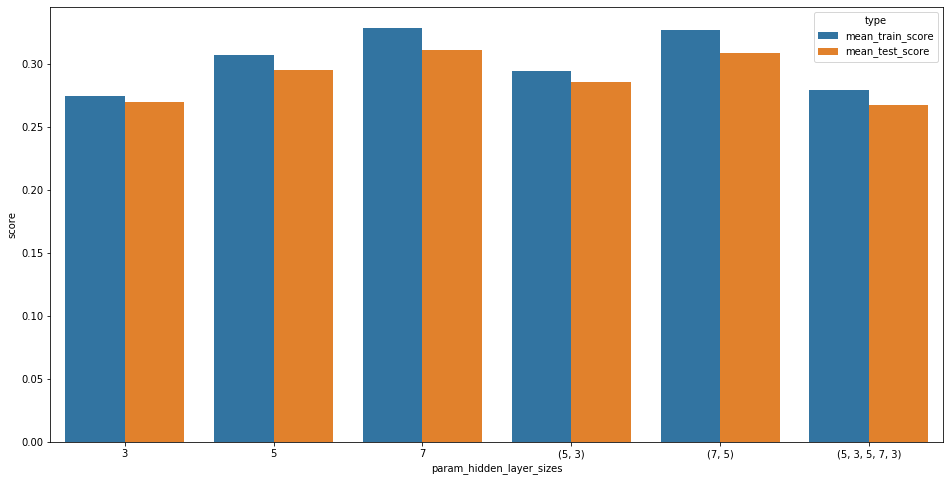

In [158]:
plot_grid_search_results(gs).show()
fig = plotly_grid_search_results(gs)
fig.update_yaxes(title_text='accuracy')
fig.show()

In [197]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(60, 30, 15), activation='logistic', max_iter=500)

In [198]:
nn.fit(ultimate_X_train,ultimate_y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 30, 15), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [199]:
nn.score(ultimate_X_test,ultimate_y_test)

0.3905297142173861

In [204]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(60, 30, 15), activation='logistic', max_iter=500, verbose=True)
scaler = StandardScaler()
scaler.fit(ultimate_X_train)
scaled_ult_x_train = scaler.transform(ultimate_X_train)
scaled_ult_x_test = scaler.transform(ultimate_X_test)
nn.fit(scaled_ult_x_train,ultimate_y_train)
nn.score(scaled_ult_x_test,ultimate_y_test)

Iteration 1, loss = 2.22282457
Iteration 2, loss = 2.06580515
Iteration 3, loss = 1.99245057
Iteration 4, loss = 1.91650651
Iteration 5, loss = 1.86003716
Iteration 6, loss = 1.81066479
Iteration 7, loss = 1.76271217
Iteration 8, loss = 1.72179531
Iteration 9, loss = 1.68893569
Iteration 10, loss = 1.65525308
Iteration 11, loss = 1.62435951
Iteration 12, loss = 1.59994220
Iteration 13, loss = 1.57909323
Iteration 14, loss = 1.55356333
Iteration 15, loss = 1.54369390
Iteration 16, loss = 1.53447469
Iteration 17, loss = 1.50959259
Iteration 18, loss = 1.49850343
Iteration 19, loss = 1.48680346
Iteration 20, loss = 1.47479158
Iteration 21, loss = 1.46954442
Iteration 22, loss = 1.45239173
Iteration 23, loss = 1.44771638
Iteration 24, loss = 1.44216873
Iteration 25, loss = 1.43014849
Iteration 26, loss = 1.42023875
Iteration 27, loss = 1.41223950
Iteration 28, loss = 1.40764981
Iteration 29, loss = 1.40068673
Iteration 30, loss = 1.39590757
Iteration 31, loss = 1.38642012
Iteration 32, los

Iteration 253, loss = 1.10462487
Iteration 254, loss = 1.10953928
Iteration 255, loss = 1.10541261
Iteration 256, loss = 1.10576721
Iteration 257, loss = 1.09646926
Iteration 258, loss = 1.10822769
Iteration 259, loss = 1.10517006
Iteration 260, loss = 1.10332955
Iteration 261, loss = 1.09365197
Iteration 262, loss = 1.10044583
Iteration 263, loss = 1.09130034
Iteration 264, loss = 1.09521182
Iteration 265, loss = 1.10358097
Iteration 266, loss = 1.10182438
Iteration 267, loss = 1.09840452
Iteration 268, loss = 1.10125541
Iteration 269, loss = 1.10189564
Iteration 270, loss = 1.09914583
Iteration 271, loss = 1.10311176
Iteration 272, loss = 1.09759610
Iteration 273, loss = 1.10513748
Iteration 274, loss = 1.09687772
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.31280640918330743

In [173]:
nn?

In [183]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(30, 15))

In [184]:
nn.fit(ultimate_X_train,ultimate_y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 15), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [186]:
nn.score(ultimate_X_test,ultimate_y_test)

0.36685399976085137

In [193]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(90, 60, 30))

In [194]:
nn.fit(ultimate_X_train,ultimate_y_train)
nn.score(ultimate_X_test,ultimate_y_test)

0.3922037546335047

In [195]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(90, 60, 30, 15))
nn.fit(ultimate_X_train,ultimate_y_train)
nn.score(ultimate_X_test,ultimate_y_test)

0.3905297142173861

In [200]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(180, 90, 45, 15), max_iter = 500)
nn.fit(ultimate_X_train,ultimate_y_train)
nn.score(ultimate_X_test,ultimate_y_test)

0.40559607796245367

In [210]:
nn = MLPClassifier(alpha=1e-3, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(360, 180, 90, 45, 30, 15), max_iter = 100, verbose=True)
nn.fit(ultimate_X_train,ultimate_y_train)
nn.score(ultimate_X_test,ultimate_y_test)

Iteration 1, loss = 2.09329459
Iteration 2, loss = 1.88422766
Iteration 3, loss = 1.77970585
Iteration 4, loss = 1.69735897
Iteration 5, loss = 1.62606904
Iteration 6, loss = 1.56460746
Iteration 7, loss = 1.50948264
Iteration 8, loss = 1.46380760
Iteration 9, loss = 1.41812901
Iteration 10, loss = 1.37878038
Iteration 11, loss = 1.34752371
Iteration 12, loss = 1.31365019
Iteration 13, loss = 1.28633369
Iteration 14, loss = 1.26826440
Iteration 15, loss = 1.23327879
Iteration 16, loss = 1.21983634
Iteration 17, loss = 1.19205212
Iteration 18, loss = 1.16874902
Iteration 19, loss = 1.15223639
Iteration 20, loss = 1.13060653
Iteration 21, loss = 1.11460939
Iteration 22, loss = 1.11010925
Iteration 23, loss = 1.08576078
Iteration 24, loss = 1.07823506
Iteration 25, loss = 1.06560480
Iteration 26, loss = 1.04270660
Iteration 27, loss = 1.03733149
Iteration 28, loss = 1.02401387
Iteration 29, loss = 1.01490827
Iteration 30, loss = 1.00503664
Iteration 31, loss = 1.00768707


/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.



0.4211407389692694

In [208]:
nn = MLPClassifier(alpha=1e-4, random_state=42, learning_rate_init=0.01, 
                   hidden_layer_sizes=(360, 180, 90, 45, 30, 15), max_iter = 500, verbose=True)
nn.fit(scaled_ult_x_train,ultimate_y_train)
nn.score(scaled_ult_x_test,ultimate_y_test)

Iteration 1, loss = 2.06876269
Iteration 2, loss = 1.87494050
Iteration 3, loss = 1.77806452
Iteration 4, loss = 1.71054033
Iteration 5, loss = 1.63709503
Iteration 6, loss = 1.58563662
Iteration 7, loss = 1.53688738
Iteration 8, loss = 1.50268724
Iteration 9, loss = 1.46260631
Iteration 10, loss = 1.42208812
Iteration 11, loss = 1.39929578
Iteration 12, loss = 1.36572384
Iteration 13, loss = 1.34944112
Iteration 14, loss = 1.32470166
Iteration 15, loss = 1.30284782
Iteration 16, loss = 1.26608983
Iteration 17, loss = 1.25419091
Iteration 18, loss = 1.22132573
Iteration 19, loss = 1.19848552
Iteration 20, loss = 1.17278354
Iteration 21, loss = 1.18736078
Iteration 22, loss = 1.19024221
Iteration 23, loss = 1.15024771
Iteration 24, loss = 1.11740436
Iteration 25, loss = 1.12602826
Iteration 26, loss = 1.11625900
Iteration 27, loss = 1.12878068
Iteration 28, loss = 1.10878308
Iteration 29, loss = 1.10286457
Iteration 30, loss = 1.07611194
Iteration 31, loss = 1.06105573
Iteration 32, los

/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.



0.4168360636135358

### RANDOM FOREST BOOSTING

In [240]:
x = test_subset[cols]
y_space = test_subset['spacegroup_number']
x_train, x_test, y_space_train, y_space_test = train_test_split(x, y_space, test_size=0.2)
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_space_train)
train = model.score(x_train, y_space_train)
test = model.score(x_test, y_space_test)
print('train accuracy:', train, "\ntest accuracy:", test)   

train accuracy: 1.0 
test accuracy: 0.358


In [259]:
x = test_subset[cols]
y = test_subset['bravais_lattice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
train = model.score(x_train, y_train)
test = model.score(x_test, y_test)
print('train accuracy:', train, "\ntest accuracy:", test)  

train accuracy: 1.0 
test accuracy: 0.451


In [260]:
model = AdaBoostClassifier(RandomForestClassifier(random_state=42))
model.fit(x_train, y_train)
train = model.score(x_train, y_train)
test = model.score(x_test, y_test)
print('train accuracy:', train, "\ntest accuracy:", test)  

train accuracy: 1.0 
test accuracy: 0.4695


In [267]:
rf_optimized = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5, min_samples_leaf= 1, 
                                     max_features= 'sqrt', max_depth= 70, bootstrap= False)
rf_optimized.fit(x_train, y_train)
train = rf_optimized.score(x_train, y_train)
test = rf_optimized.score(x_test, y_test)
print('train accuracy:', train, "\ntest accuracy:", test)  

train accuracy: 1.0 
test accuracy: 0.496


In [266]:
rand_for = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, 
                                     max_features= 'sqrt', max_depth= 70, bootstrap= False)
model = AdaBoostClassifier(rand_for)
model.fit(x_train, y_train)
train = model.score(x_train, y_train)
test = model.score(x_test, y_test)
print('train accuracy:', train, "\ntest accuracy:", test)  

train accuracy: 1.0 
test accuracy: 0.4965


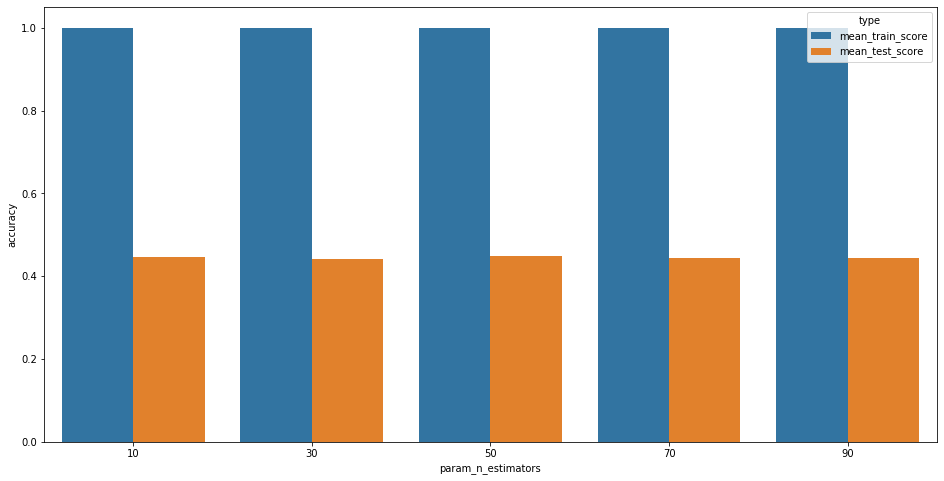

In [244]:
model = AdaBoostClassifier(RandomForestClassifier(random_state=42))

gs = GridSearchCV(
    model,
    param_grid={"n_estimators": range(10, 100, 20)},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(x, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

In [262]:
gs.best_params_

{'n_estimators': 50}

In [341]:
x = test_subset[cols]
y = test_subset['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [342]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [350]:
# x_in = Input(shape=(x.shape[1],))
# x_h1 = Dense(13, activation="relu")(x_in)
# x_h2 = Dense(11, activation="relu")(x_h1)
# x_out = Dense(1)(x_h2)
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=x.shape[1],),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(14)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [351]:
x_train = np.array(x_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
x_test = np.array(x_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')

In [352]:
model.fit(x_train, y_train, epochs=10, verbose=2)

Train on 8000 samples
Epoch 1/10
8000/8000 - 1s - loss: 2.4944 - accuracy: 0.1301
Epoch 2/10
8000/8000 - 1s - loss: 2.3258 - accuracy: 0.1787
Epoch 3/10
8000/8000 - 1s - loss: 2.2987 - accuracy: 0.1912
Epoch 4/10
8000/8000 - 1s - loss: 2.2842 - accuracy: 0.1965
Epoch 5/10
8000/8000 - 1s - loss: 2.2744 - accuracy: 0.2084
Epoch 6/10
8000/8000 - 1s - loss: 2.2701 - accuracy: 0.2103
Epoch 7/10
8000/8000 - 1s - loss: 2.2633 - accuracy: 0.2074
Epoch 8/10
8000/8000 - 1s - loss: 2.2590 - accuracy: 0.2085
Epoch 9/10
8000/8000 - 0s - loss: 2.2565 - accuracy: 0.2059
Epoch 10/10
8000/8000 - 1s - loss: 2.2527 - accuracy: 0.2083


In [353]:
eva = model.evaluate(x_test, y_test, verbose=2)

2000/1 - 0s - loss: 2.5073 - accuracy: 0.1625


In [367]:
X = test_subset[cols]
y = test_subset['bravais_lattice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [356]:
X_train.head()

y0             y1             y2             y3  \
3269   2.217852e-196  3.695830e-165  1.188915e-136  7.383279e-111   
36321   0.000000e+00   0.000000e+00  6.272163e-320  9.838955e-280   
18050  1.511438e-102   1.722612e-80   3.790045e-61   1.609758e-44   
36680   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3222   1.342632e-127  5.792253e-103   4.823892e-81   7.755453e-62   

                  y4             y5             y6             y7  \
3269    8.851302e-88   2.048446e-67   9.151691e-50   7.892920e-35   
36321  2.979473e-242  1.741764e-207  1.965617e-175  4.282208e-146   
18050   1.319885e-30   2.089159e-19   6.383607e-11   3.765480e-05   
36680   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
3222    2.407001e-45   1.442131e-31   1.667988e-20   3.724263e-12   

                  y8            y9  ...      y170      y171      y172  \
3269    1.314116e-22  4.223659e-13  ...  0.014827  0.020789  0.021917   
36321  1.800927e-119  1.462124e-95  ...  0.013459  0.019593  0.089738   
18050   4.287795e-02  9.425560e-02  ...  0.010426  0.000638  0.000585   
36680   0.000000e+00  0.000000e+00  ...  0.000006  0.013341  0.176781   
3222    1.605267e-06  1.335715e-03  ...  0.030326  0.036199  0.033826   

           y173      y174          y175      y176      y177      y178  \
3269   0.017774  0.012943  1.613332e-02  0.016881  0.021034  0.027750   
36321  0.072916  0.065420  6.181893e-04  0.001220  0.048601  0.061495   
18050  0.001234  0.000009  1.508457e-03  0.001107  0.003858  0.032604   
36680  0.012437  0.000003  2.398055e-07  0.002829  0.064420  0.002832   
3222   0.032900  0.030406  2.637342e-02  0.025170  0.030814  0.016979   

               y179  
3269   1.442539e-02  
36321  1.160063e-03  
18050  1.521572e-03  
36680  2.403414e-07  
3222   1.126763e-02  

[5 rows x 180 columns]

In [357]:
y_train.head()

3269     aP
36321    tI
18050    hR
36680    tI
3222     aP
Name: bravais_lattice, dtype: object

In [361]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [364]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_v2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_v2.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


OSError: [Errno 22] Invalid argument

In [365]:
rf_random_v2 = RandomForestClassifier(n_estimators= 4000, min_samples_split=5, 
                                     min_samples_leaf=1, max_features='sqrt', 
                                      max_depth= 70, bootstrap=False)
rf_random_v2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=4000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [368]:
rf_random_v2.score(X_test, y_test)

0.891

In [369]:
rf_random_v2.score(ultimate_X_test, ultimate_y_test)

0.585316274064331

In [370]:
rf_random_v3 = rf_random_v2.fit(ultimate_X_train, ultimate_y_train)

In [371]:
rf_random_v3.score(ultimate_X_test, ultimate_y_test)

0.5823269161784049

In [ ]:
rf_random_v4 = rf_random_v2.fit(ultimate_X, ultimate_y)

In [ ]:
{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}